# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
!pip install scikit-learn

In [3]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [4]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

C:\Users\A\AppData\Local\Temp\ipykernel_11024\2438761054.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired')
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


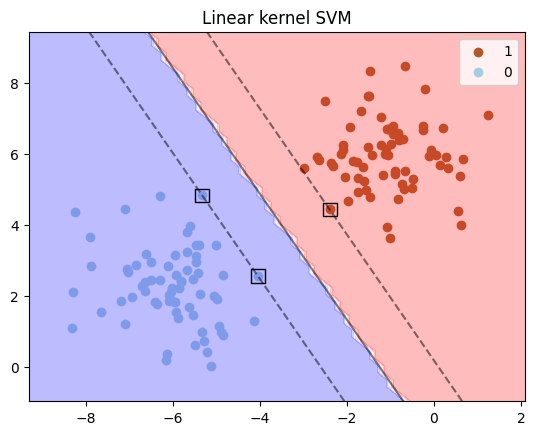

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

#### Answer

C:\Users\A\AppData\Local\Temp\ipykernel_11024\3357901993.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired')
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\A\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


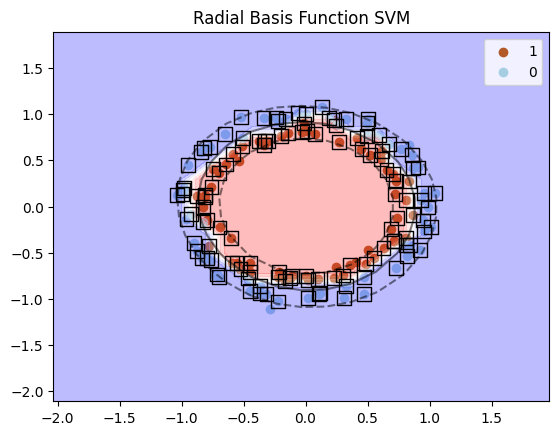

In [6]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model
model = svm.SVC(kernel='rbf', gamma=0.5)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial Basis Function SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

RBF and Linear Kernels are used for different types of problems based on the nature of the data, praticularly its linearity.
In the linear kernel the model tries to find a linear hyperplane that best separates the classes in the feature spac, while the RBF kernel is a non-linear kernel that maps data into a higher-dimensional space.

This way, an RBF kernel should be used over a linear kernel when the studied data is not linearly separable, i.e. the data exhibits complex, non-linear relationships that cannot be captured by a straight line or hyperplane.


<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

Yes, normalizing data before using a kernel function is necessary.

Many kernel functions, such as RBF, are sensitive to the scale of the input features. If the features have different ranges, the kernel may assign disproportionate importance to features with larger magnitudes, distorting the similarity measure.

Normalization can also lead to better convergence, as it ensures that the optimization problem is well-conditioned.

## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, precision_score
from sklearn.preprocessing import StandardScaler

# Assumption: drug_response contains IC50 values, and we will classify based on z-scores
# Classifying as sensitive (z-score < 0) or resistant (z-score > 0)
drug_response_zscores = (drug_response - drug_response.mean(axis=0)) / drug_response.std(axis=0)
drug_response_binary = np.where(drug_response_zscores < 0, 0, 1)  # 0 = sensitive, 1 = resistant

# Scaling the gene_expression data for SVM
scaler = StandardScaler()
gene_expression_scaled = scaler.fit_transform(gene_expression)

# Split the data into training and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(gene_expression_scaled, drug_response_binary, test_size=0.33, random_state=333)

y_train = y_train.ravel()  # to flatten
y_test = y_test.ravel()    # to flatten

# Define an SVM classifier
model = svm.SVC()

# Define a grid of parameters to search (tuning C and gamma for RBF and linear kernels)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Use GridSearchCV to find the best parameters
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid.best_params_)

# Make predictions on the test set
y_pred = grid.predict(X_test)

# Calculate classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision score manually for comparison
precision_manual = precision_score(y_test, y_pred)
print("Precision (Manual Calculation):", precision_manual)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

### Explanation of Code

The code starts by normalizing drug response data into z-scores to classify cell lines as sensitive or resistant. Gene expression data is then standardized using `StandardScaler` to ensure compatibility with the SVM model. The dataset is split into training and testing sets using `train_test_split`. An SVM classifier is defined, and `GridSearchCV` is used to perform hyperparameter tuning across a grid of values for `C`, `gamma`, and kernel type, using 5-fold cross-validation. After fitting the model to the training data, predictions are made on the test set, and classification metrics like precision are calculated to assess performance.


### Results and Discussion

This code applies an SVM classifier to predict drug response based on gene expression data, using a binary classification scheme where cell lines are categorized as either sensitive or resistant. The drug response values are normalized into z-scores, and a grid search with cross-validation is used to fine-tune hyperparameters (C, gamma, and kernel type). The best parameters found (*C* = 100, *gamma* = 0.001, *kernel* = 'rbf') suggest that a high regularization parameter (C) and a small gamma value for the RBF kernel work best for this dataset, indicating a preference for a flexible decision boundary with low influence of individual points.

The model's performance, with an overall accuracy of 71%, shows reasonable success in classifying sensitive cell lines (precision = 0.85). However, its performance on resistant cell lines is less satisfactory, with a lower precision of 0.57 and an f1-score of 0.65, pointing to a trade-off between precision and recall. The precision score manually calculated (0.565..) matches that of the resistant class in the classification report, confirming the model's weaker ability to accurately identify resistant cases. This suggests that while the classifier captures the general pattern, it struggles with minority class prediction. To solve this we can explore the hyperparameter space more, or use data balancing to improve overall precision and recall for resistant cell lines.

## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 


#### Answer

In [ ]:
import sys
sys.path.append('code/')
from random_forest_model import *

#parameter grid for random forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of each tree
    'max_features': ['sqrt', 'log2', None],   # Max features to consider at each split
    'min_samples_split': [2, 5, 10],          # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # Min samples required per leaf node
    'criterion': ['gini', 'entropy'],         # Function to measure the quality of a split
    'bootstrap': [True],
    'oob_score':[True]
}

# Train the random forest model using GridSearchCV
rf_grid = train_random_forest(X_train, y_train, rf_param_grid)

print("Best Parameters for Random Forest:", rf_grid.best_params_)

# Evaluate the model
evaluate_random_forest(rf_grid, X_test, y_test)

# Plot feature importances 
plot_feature_importances(rf_grid, gene_expression.columns.tolist())


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_sam

### Explanation of Code
In this code, we implement a Random Forest classifier with hyperparameter tuning using GridSearchCV. We define a parameter grid (`param_grid`) with options for tuning parameters such as the number of trees (`n_estimators`), the maximum depth of each tree (`max_depth`), and the criterion for splitting nodes (`criterion`). The train_random_forest function trains the model on the provided data, returning the best model according to cross-validated performance.

For model evaluation, `evaluate_random_forest` calculates and displays precision using both `classification_report` and `precision_score` to verify that our calculations match.

Finally, the `plot_feature_importances` function visualizes the top 50 features based on their calculated importance values within the fitted Random Forest model. We use a horizontal bar plot to clearly highlight the most informative features in the dataset, which aids in interpreting the classifier's focus areas.

### Results and Discussion

In our analysis, we observe that the Random Forest classifier and SVM both show promising but varied performance on the GDSC dataset. For the SVM model, we achieved an overall accuracy of 71% with a precision of approximately 0.57 for class 1, as calculated manually. The classification report indicates that the SVM model performed better on class 0 (precision of 0.85) than on class 1, which may suggest a need for more balanced class representation or parameter tuning for improved class 1 performance.

On the other hand, the Random Forest model yielded a slightly lower accuracy of 67%, with a manually calculated precision for class 1 of around 0.52. This model also performed better on class 0 (precision of 0.81) than on class 1, similar to the SVM. Despite a marginally lower accuracy than SVM, Random Forest provides the additional benefit of feature importance evaluation. Our feature importance analysis highlights the top 50 informative features, with ABCB1 standing out as the most influential gene in predicting drug sensitivity, followed by SELENBP1.

These insights suggest that while SVM may have a slight edge in accuracy, Random Forest's interpretability through feature importance makes it valuable for identifying biologically significant markers in drug sensitivity.

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>



The 2019 paper written by Lind and Anderson aims to develop accurate machine learning models capable of predicting the effectiveness of small-molecule drugs against various cancer cell lines using a minimal amount of genomic data. Specifically, the researchers aimed to create models that could generalize across multiple cancer types, utilize the most current and comprehensive drug and cell line data available, and be simple enough for non-computational specialists to employ.

The researchers chose to use random forest algorithms for both classification and regression tasks. Random forests were selected for several reasons: they are known for their high accuracy in predictive modeling, can efficiently handle large datasets with numerous input variables, are capable of identifying important features for classification, are relatively simple to implement and interpret, are robust against noise and outliers in the data, can effectively handle missing data through imputation, and have performed well in previous drug sensitivity prediction challenges and studies (Lind & Anderson, 2019).

Although not explicitly mentioned, based on the nature of the classification task and the high importance given to the model's explainability, a Random Forest model might have been chosen rather than an SVM-based model. In contrast to SVMs, RF models are better suited for multiclass problems, as SVMs would require multiple binary classifications. Additionally, RF models return the probability of a sample belonging to a certain class, while SVMs return the distance to the closest decision boundary. This characteristic of RF models adds to the ease of interpretation of results by people outside the study.

Sources: Lind, A. P., & Anderson, P. C. (2019). Predicting drug activity against cancer cells by random forest models based on minimal genomic information and chemical properties. PloS one, 14(7), e0219774.
